In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import nsfg
import first
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [72]:
#Building a probability Function
import random
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates] 
    mse = np.mean(e2)
    return math.sqrt(mse)

#The larger n is, the lower the MSE will be since you will be closer to the mean with larger sample sizes
def Estimate1(n=7, m=100):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)] 
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

Estimate1()

rmse xbar 0.3622318189307347
rmse median 0.4452940627899768


In [84]:
def Simul(mu=90, sigma=7.5, n=9, m=200):
    means = []
    for i in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderror = RMSE(means, mu)
    return cdf, stderror

RMSE: 2.612151753578551


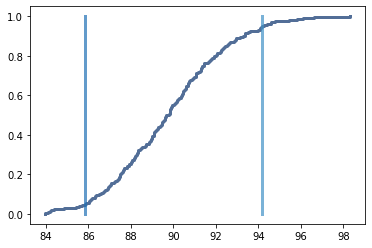

In [87]:
output = Simul()
print('RMSE:', output[1])
thinkplot.Cdf(output[0])
thinkplot.Plot([output[0].Percentile(5), output[0].Percentile(5)], [0, 1], linewidth=3)
thinkplot.Plot([output[0].Percentile(95), output[0].Percentile(95)], [0, 1], linewidth=3)

### Exponential

In [101]:
a = np.array([5.384, 4.493, 19.198, 2.790, 6.122, 12.844])
Lambda = 1/a.mean() #Good but does not work well with outliers
Lambdam = math.log(2)/np.median(a)
Lambda, Lambdam

(0.11803820503236212, 0.1204844742847115)

### Exercise 8.2 
Suppose you draw a sample with size n = 10 from an exponen- tial distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of standard error versus n.

Conf Interval:  (1.275520924485231, 3.5173563604042775)
Std Error: 0.7725527773340661


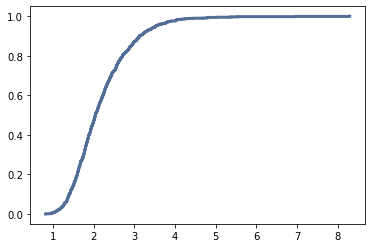

In [168]:
def SimExp(n=10, lam=2, m=1000):
    means = []
    for i in range(m):
        xs = np.random.exponential(1/lam, n)
        new_xs = 1/np.mean(xs)
        means.append(new_xs)
    
    serror = RMSE(means, lam)
    cdf = thinkstats2.Cdf(means)
    #Confidence Interval:
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('Conf Interval: ', ci)
    print('Std Error:', serror)
    return means, serror, cdf

outcome = SimExp()
thinkplot.Plot(outcome[2])
    
    


/Users/sairamsubramaniam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sairamsubramaniam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Conf Interval:  (nan, nan)
Std Error: nan
Conf Interval:  (1.5958922876847914, 2.542908202650432)
Std Error: 0.3001371463395343
Conf Interval:  (1.695998109861955, 2.369090408762344)
Std Error: 0.2077063674300864
Conf Interval:  (1.7441083868409049, 2.301355140296873)
Std Error: 0.16731002280597862
Conf Interval:  (1.7769735485638463, 2.2568487198819556)
Std Error: 0.14245971463022514


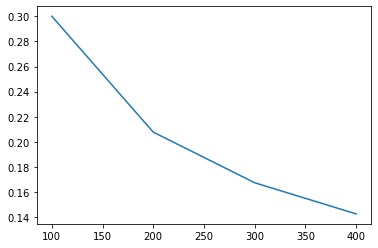

In [167]:
def SimMult(nvals):
    errlist = []
    for i in nvals:
        errlist.append(SimExp(i)[1])
    return errlist, nvals

test = SimMult(np.arange(0, 500, 100))

plt.plot(test[1], test[0])

### Solution:
1. Using the original conditions and the Mean as the estimator, the results are Conf Interval~  (1.275520924485231, 3.5173563604042775) Std Error~ 0.7725527773340661

2. As the size per sample goes up, the std error drops.  This makes sense since the larger the sample, the more likely it is that the mean of the sample will be closer to the Actual Mean.  

### Exercise 8.3 
In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.
Write a function that takes a goal-scoring rate, lam, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.
Write another function that simulates many games, stores the estimates of lam, then computes their mean error and RMSE.
Is this way of making an estimate biased? Plot the sampling distribution of the estimates and the 90% confidence interval. What is the standard error? What happens to sampling error for increasing values of lam?

In [233]:
def Goals(lam):
    time = 0
    goals = 0
    while time < 1:
        time_between = random.expovariate(lam)
        goals += 1
        time+= time_between
    return goals

Goals(1)

12

(3.0766865293688923, 1.008)

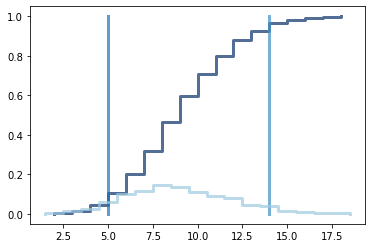

In [248]:
def Games(lam=8, m=1000):
    result = []
    for i in range(m):
        result.append(Goals(lam))
    #Standard Error
    serror = RMSE(result, lam)
    #Mean Error
    errors = [i-lam for i in result]
    merror = np.mean(errors)
    cdf = thinkstats2.Cdf(result)
    thinkplot.Plot(cdf)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    thinkplot.Plot([ci[0], ci[0]], [0, 1])
    thinkplot.Plot([ci[1], ci[1]], [0, 1])
    hist = thinkstats2.Pmf(result)
    thinkplot.Pmf(hist)
    return serror, merror
output = Games()
output